In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc

# **Dataset Preparation and Preprocessing**

In [178]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 74 (delta 18), reused 62 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 23.51 MiB | 19.09 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [179]:
df = pd.read_csv('/content/ENCS5141Datasets/ENCS5141_Exp3_MedicalCostPersonalDatasets.csv')
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [180]:
df.shape

(1338, 7)

In [181]:
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


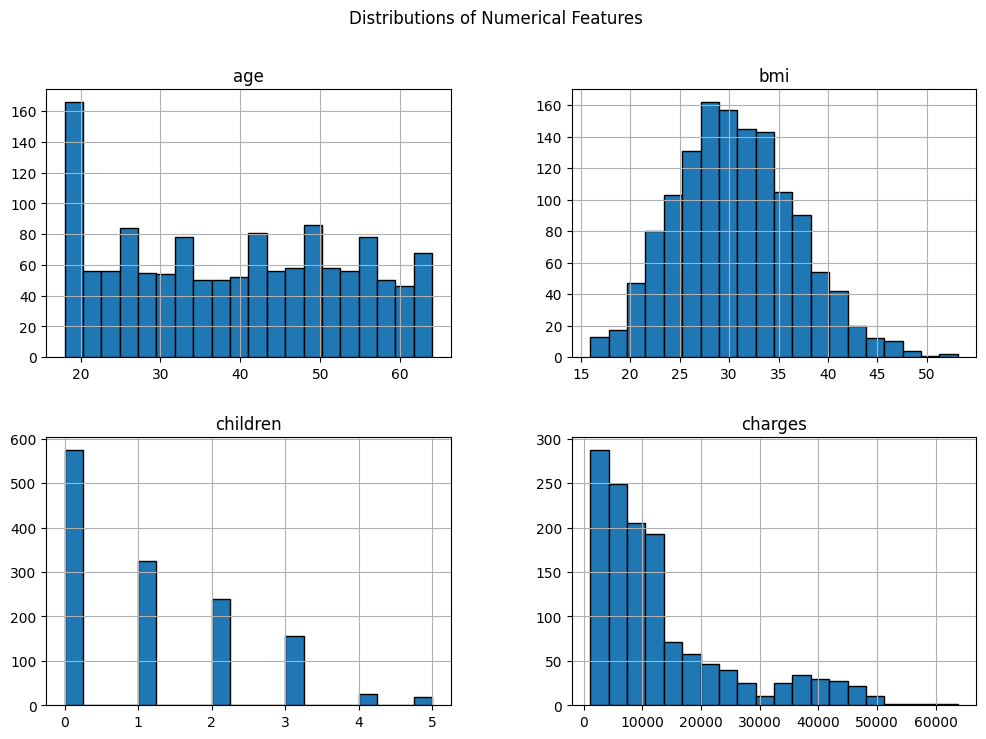

In [182]:
numerical_columns = ['age', 'bmi', 'children', 'charges']

df[numerical_columns].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Distributions of Numerical Features')
plt.show()

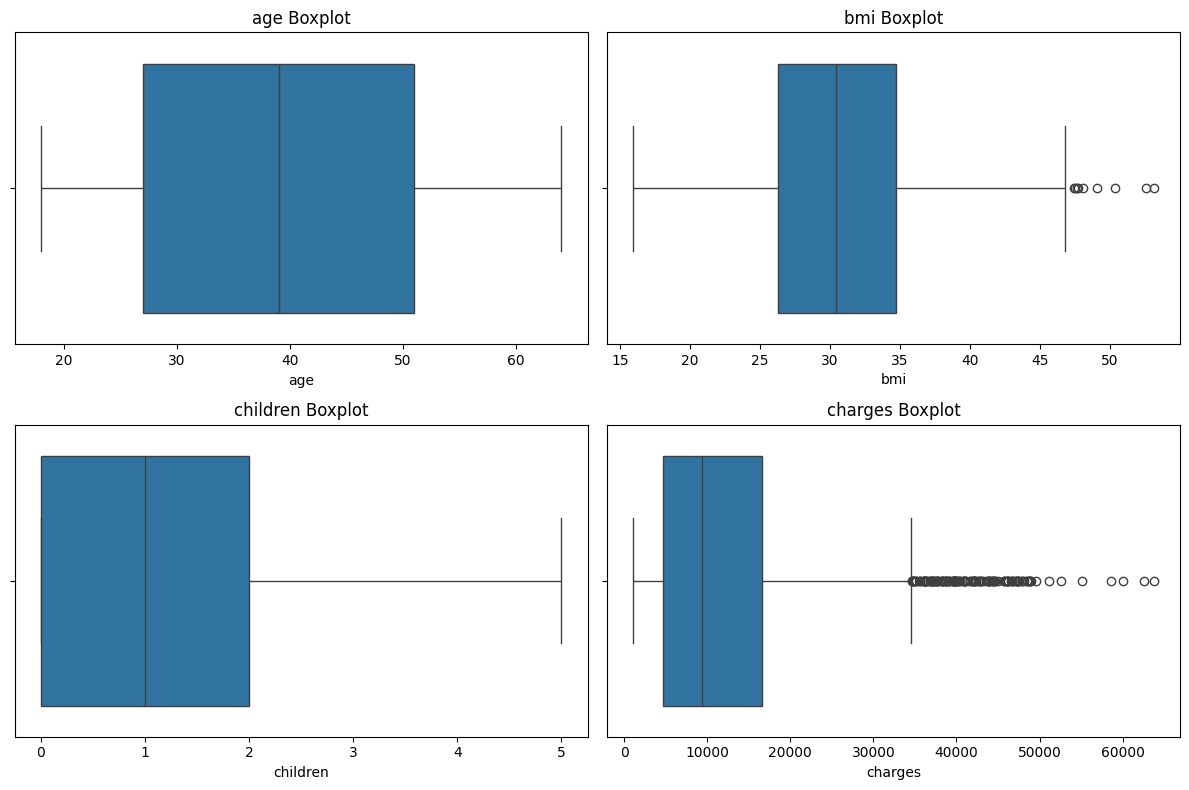

In [183]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

<ipython-input-184-fc0eac45db4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-184-fc0eac45db4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-184-fc0eac45db4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


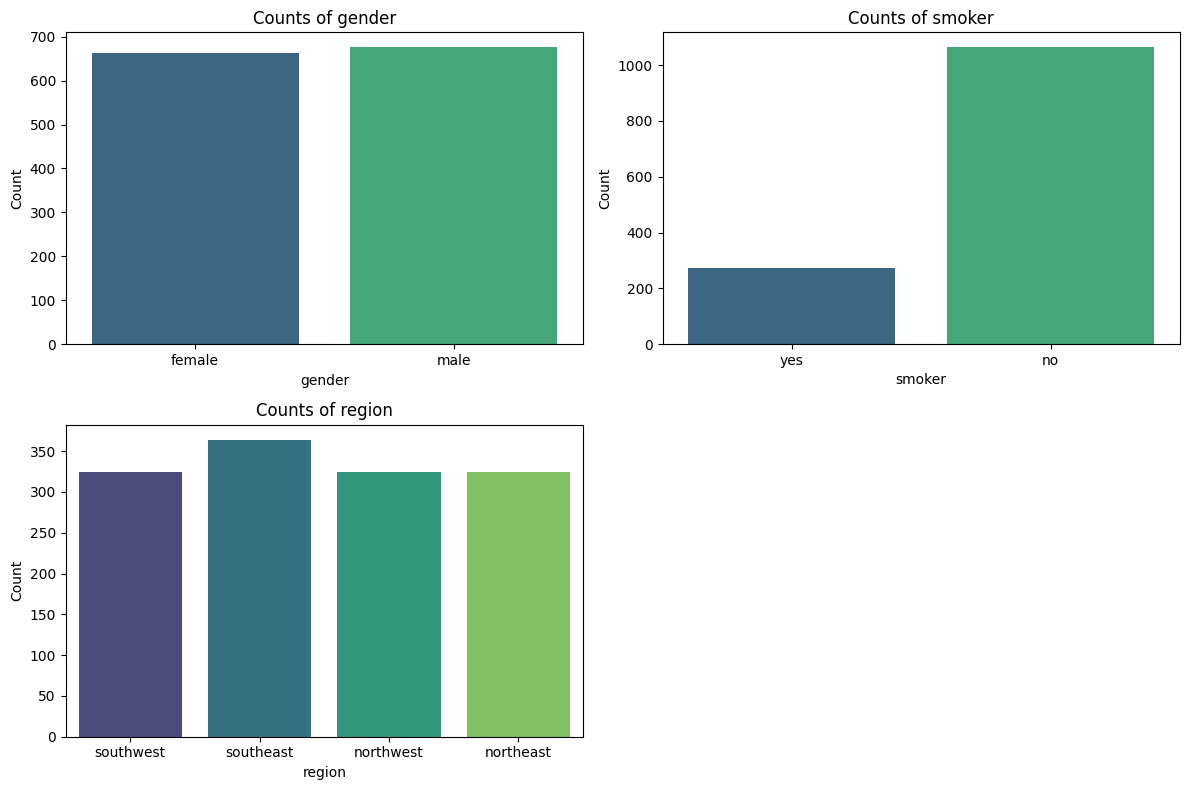

In [184]:
categorical_columns = ['gender', 'smoker', 'region']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Counts of {col}')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


## **1. Encoding Catagorical Features:**

In [185]:

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## **2.	Normalization**

In [186]:
# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Apply Min-Max scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()


,age,gender,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,3,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.458434,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,1,0.333010
4,0.304348,1,0.347592,0.0,0,1,0.043816


# **Split the Data**

Split the dataset into training and testing sets to evaluate model performance.

In [187]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,3,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.458434,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,1,0.333010
4,0.304348,1,0.347592,0.0,0,1,0.043816


# **Part 1: K-Nearest Neighbors (KNN)**

In [188]:
# Splitting the data to features (X) and target variable (y)
X = df.drop('region', axis=1)
y = df['region']

# Splitting into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the sizes of the splits
split_sizes = {
    "Training Set": len(X_train),
    "Validation Set": len(X_validation),
    "Test Set": len(X_test)
}

split_sizes

{'Training Set': 802, 'Validation Set': 268, 'Test Set': 268}

In [189]:
print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)


X_train shape: (802, 6)
X_validation shape: (268, 6)


### **Experiment with Different Distance Metrics and Use Cross-Validation to Determine Optimal K**

In [190]:
#################### Optimal K Selection and Evaluation Using Validation and test Set ####################

# Define the distance metrics to test
metrics = ['euclidean', 'manhattan', 'cosine']

# Grid search for optimal K
param_grid = {'n_neighbors': np.arange(1, 21)}  # Test K from 1 to 20
best_k_results = {}
validate_results = {}
final_results = {}

for metric in metrics:
    # GridSearchCV to find the best K
    grid_search = GridSearchCV(
        KNeighborsClassifier(metric=metric),
        param_grid,
        cv=5,
        scoring='accuracy'
    )

    grid_search.fit(X_train, y_train)

    # Get the best K and corresponding score
    best_k = grid_search.best_params_['n_neighbors']
    best_score = grid_search.best_score_
    best_k_results[metric] = (best_k, best_score)

    # Train and evaluate using the best K on the validation set
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred_val = knn.predict(X_validation)
    y_pred = knn.predict(X_test)

    # Evaluate performance on validation set
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    precision_val = precision_score(y_validation, y_pred_val, average='weighted')
    recall_val = recall_score(y_validation, y_pred_val, average='weighted')
    f1_val = f1_score(y_validation, y_pred_val, average='weighted')

    # Store the validation results
    validate_results[metric] = {
        "Best K": best_k,
        "CV Accuracy": best_score, # Cross-Validation Accuracy
        "Validation Accuracy": accuracy_val,
        "Precision": precision_val,
        "Recall": recall_val,
        "F1-Score": f1_val
    }
    # Check if probability predictions are supported for ROC-AUC
    try:
        y_proba = knn.predict_proba(X_test)  # Probability predictions
        if len(y_test.unique()) > 2:  # Multi-class case
            roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        else:  # Binary case
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    except AttributeError:
        roc_auc = "Not Supported"

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    final_results[metric] = {
        "Best K": best_k,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }


In [191]:
# Convert final_results into a DataFrame
validate_results_df = pd.DataFrame(validate_results).T  # Transpose to align metrics as columns
print("\nOptimal K and Performance for Each Distance Metric:")
validate_results_df


Optimal K and Performance for Each Distance Metric:


,Best K,CV Accuracy,Validation Accuracy,Precision,Recall,F1-Score
euclidean,20.0,0.305489,0.283582,0.286311,0.283582,0.269156
manhattan,2.0,0.298043,0.272388,0.324799,0.272388,0.248241
cosine,1.0,0.301778,0.294776,0.295142,0.294776,0.293147


In [192]:
test_results_df = pd.DataFrame(final_results).T  # Transpose to align metrics as columns
print("\nFinal Performance for Each Distance Metric:")
test_results_df


Final Performance for Each Distance Metric:


,Best K,Accuracy,Precision,Recall,F1-Score,ROC-AUC
euclidean,20.0,0.302239,0.303644,0.302239,0.296450,0.533224
manhattan,2.0,0.268657,0.282808,0.268657,0.245237,0.518469
cosine,1.0,0.272388,0.278199,0.272388,0.273804,0.514235


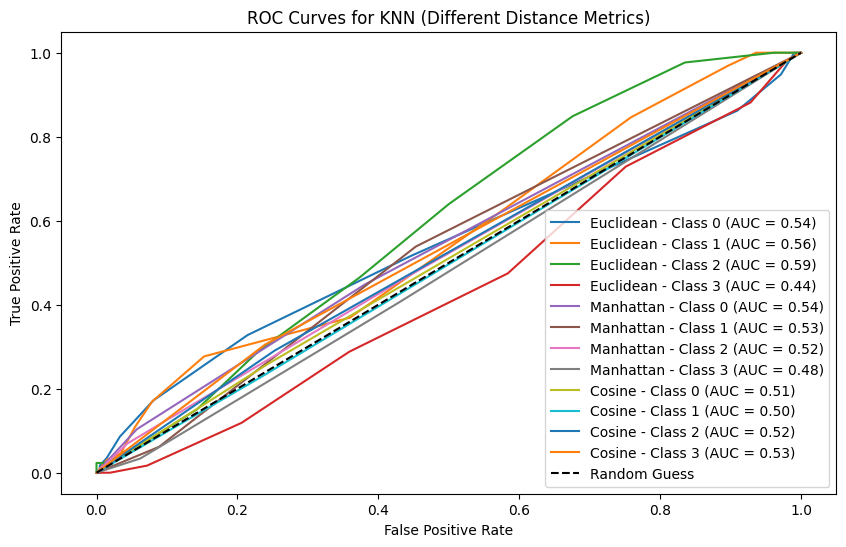

In [193]:
# Plot ROC curves for KNN with different distance metrics

plt.figure(figsize=(10, 6))

for metric, values in final_results.items():
    best_k = values["Best K"]  # Access the Best K
    knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn_model.fit(X_train, y_train)
    y_proba_test = knn_model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    y_test_dummies = pd.get_dummies(y_test)  # Convert to one-hot encoding
    for i, class_label in enumerate(y_test_dummies.columns):
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test_dummies.iloc[:, i], y_proba_test[:, i])
        roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

    # Plot the ROC curve for each class
    for class_label in fpr.keys():
        plt.plot(fpr[class_label], tpr[class_label],
                 label=f"{metric.capitalize()} - Class {class_label} (AUC = {roc_auc[class_label]:.2f})")

# Add plot elements
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curves for KNN (Different Distance Metrics)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# **Part 2: Logistic Regression**

In [194]:
# Evaluate Logistic Regression on validation samples
validate_results_logistic = {}

# Experiment with different regularization techniques
regularizations = ['l1', 'l2']

for reg in regularizations:
    logistic_model = LogisticRegression(penalty=reg, solver='liblinear')
    logistic_model.fit(X_train, y_train)

    # Evaluate on the validation set
    y_pred_val = logistic_model.predict(X_validation)

    accuracy_val = accuracy_score(y_validation, y_pred_val)
    precision_val = precision_score(y_validation, y_pred_val, average='weighted')
    recall_val = recall_score(y_validation, y_pred_val, average='weighted')
    f1_val = f1_score(y_validation, y_pred_val, average='weighted')

    validate_results_logistic[reg] = {
        "Validation Accuracy": accuracy_val,
        "Precision": precision_val,
        "Recall": recall_val,
        "F1-Score": f1_val
    }

print("\nFinal Performance for Each Regularization:")
validate_results_logistic_df = pd.DataFrame(validate_results_logistic).T
validate_results_logistic_df


Final Performance for Each Regularization:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Validation Accuracy,Precision,Recall,F1-Score
l1,0.305970,0.234800,0.305970,0.228307
l2,0.291045,0.343017,0.291045,0.222569


In [195]:
# Evaluate Logistic Regression on test samples
test_results_logistic = {}

for reg in regularizations:
    logistic_model = LogisticRegression(penalty=reg, solver='liblinear')
    logistic_model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba_test = logistic_model.predict_proba(X_test)

    # Evaluate on the test set
    y_pred_test = logistic_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    roc_auc_test = roc_auc_score(pd.get_dummies(y_test), y_proba_test, multi_class='ovr')

    # Store results
    test_results_logistic[reg] = {
        "Test Accuracy": accuracy_test,
        "Precision": precision_test,
        "Recall": recall_test,
        "F1-Score": f1_test,
        "ROC-AUC": roc_auc_test
    }

# Convert results to DataFrame
test_results_logistic_df = pd.DataFrame(test_results_logistic).T

# Display the results
print("\nLogistic Regression Performance with ROC-AUC:")
test_results_logistic_df


Logistic Regression Performance with ROC-AUC:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
l1,0.350746,0.261329,0.350746,0.273937,0.600086
l2,0.354478,0.374384,0.354478,0.285663,0.602323


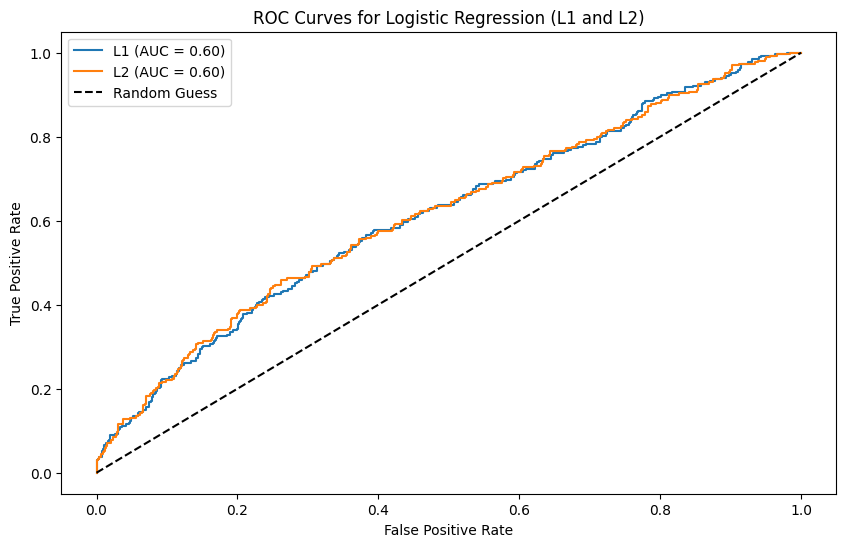

In [196]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
for reg in ['l1', 'l2']:
    logistic_model = LogisticRegression(penalty=reg, solver='liblinear')
    logistic_model.fit(X_train, y_train)
    y_proba_test = logistic_model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_proba_test.ravel())
    plt.plot(fpr, tpr, label=f"{reg.upper()} (AUC = {test_results_logistic[reg]['ROC-AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curves for Logistic Regression (L1 and L2)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **Part 3: Support Vector Machines (SVM)**

In [197]:
# Support Vector Machines (SVM)
kernels = ['linear', 'poly', 'rbf']
validate_results_svm = []

# Define the parameter grid
param_grid = {
    "kernel": kernels,
    "C": [1, 10, 100]
}

# Perform grid search
svc = SVC(probability=True)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Iterate over all combinations of parameters and store the evaluation results
for params in grid_search.cv_results_['params']:
    # Train model with the current parameters
    svm_model = SVC(kernel=params['kernel'], C=params['C'], probability=True)
    svm_model.fit(X_train, y_train)

    # Evaluate on the validation set
    y_pred_val = svm_model.predict(X_validation)
    y_proba_val = svm_model.predict_proba(X_validation)
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    precision_val = precision_score(y_validation, y_pred_val, average='weighted')
    recall_val = recall_score(y_validation, y_pred_val, average='weighted')
    f1_val = f1_score(y_validation, y_pred_val, average='weighted')
    roc_auc_val = roc_auc_score(pd.get_dummies(y_validation), y_proba_val, multi_class='ovr')

    # Store the results for this parameter combination
    validate_results_svm.append({
        "Kernel": params['kernel'],
        "C": params['C'],
        "Validation Accuracy": accuracy_val,
        "Precision": precision_val,
        "Recall": recall_val,
        "F1-Score": f1_val,
        "ROC-AUC": roc_auc_val
    })

# Convert results to a DataFrame
results_svm_df = pd.DataFrame(validate_results_svm)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# the best parameters
print("Best Parameters for SVM:")
print(f"Kernel: {best_params['kernel']}")
print(f"C: {best_params['C']}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters for SVM:
Kernel: poly
C: 10


In [198]:
print("\nAll Validation Results for SVM:")
results_svm_df


All Validation Results for SVM:


,Kernel,C,Validation Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,linear,1,0.291045,0.290348,0.291045,0.193457,0.558693
1,poly,1,0.294776,0.330258,0.294776,0.284575,0.544302
2,rbf,1,0.291045,0.287628,0.291045,0.280704,0.547767
3,linear,10,0.291045,0.182649,0.291045,0.197618,0.559730
4,poly,10,0.272388,0.292404,0.272388,0.264838,0.576223
5,rbf,10,0.279851,0.284372,0.279851,0.278796,0.564196
6,linear,100,0.294776,0.226167,0.294776,0.211160,0.561045
7,poly,100,0.328358,0.357942,0.328358,0.322788,0.578006
8,rbf,100,0.339552,0.347932,0.339552,0.339450,0.575557


In [199]:
# Evaluate All Kernel and C Combinations on the Test Set
test_results_svm = []

for params in grid_search.cv_results_['params']:
    # Train model with the current parameters
    svm_model = SVC(kernel=params['kernel'], C=params['C'], probability=True)
    svm_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = svm_model.predict(X_test)
    y_proba_test = svm_model.predict_proba(X_test)

    # Evaluate performance on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    roc_auc_test = roc_auc_score(pd.get_dummies(y_test), y_proba_test, multi_class='ovr')

    # Store the results for this parameter combination
    test_results_svm.append({
        "Kernel": params['kernel'],
        "C": params['C'],
        "Test Accuracy": accuracy_test,
        "Precision": precision_test,
        "Recall": recall_test,
        "F1-Score": f1_test,
        "ROC-AUC": roc_auc_test
    })


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [200]:
# Convert results to a DataFrame
test_results_svm_df = pd.DataFrame(test_results_svm)
print("\nTest Set Performance for All Kernel and C Combinations:")
test_results_svm_df


Test Set Performance for All Kernel and C Combinations:


,Kernel,C,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,linear,1,0.328358,0.194629,0.328358,0.239573,0.605981
1,poly,1,0.305970,0.329092,0.305970,0.302819,0.581985
2,rbf,1,0.335821,0.330983,0.335821,0.330921,0.571033
3,linear,10,0.324627,0.328488,0.324627,0.254537,0.612243
4,poly,10,0.276119,0.303991,0.276119,0.281931,0.570478
5,rbf,10,0.298507,0.299948,0.298507,0.299157,0.553558
6,linear,100,0.320896,0.282804,0.320896,0.253717,0.602490
7,poly,100,0.264925,0.299160,0.264925,0.269187,0.564393
8,rbf,100,0.283582,0.291561,0.283582,0.285958,0.542213


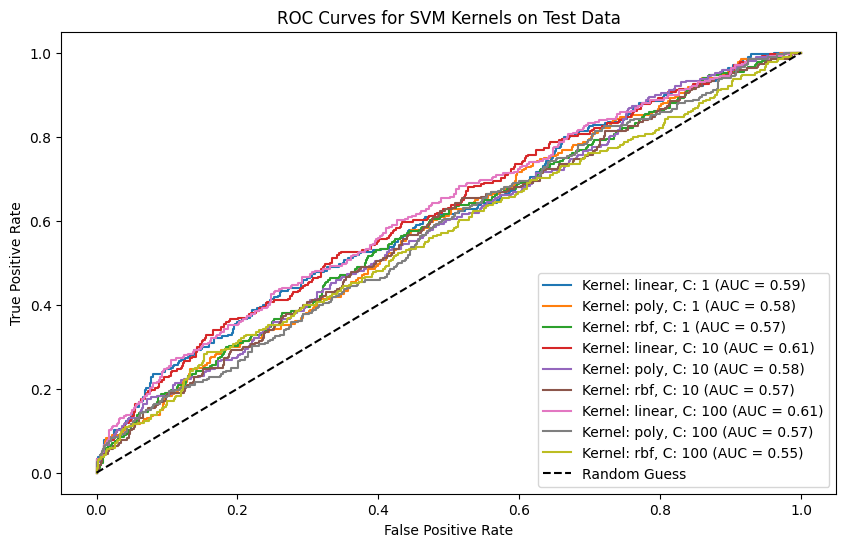

In [201]:
#################### Plot ROC Curves for the Test Set ####################

plt.figure(figsize=(10, 6))

for params in grid_search.cv_results_['params']:
    # Train model with the current parameters
    svm_model = SVC(kernel=params['kernel'], C=params['C'], probability=True)
    svm_model.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_proba_test = svm_model.predict_proba(X_test)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_proba_test.ravel())
    roc_auc = roc_auc_score(pd.get_dummies(y_test), y_proba_test, multi_class='ovr')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Kernel: {params['kernel']}, C: {params['C']} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Finalize the plot
plt.title("ROC Curves for SVM Kernels on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **Part 4: Ensemble Methods**

In [202]:
#################### Ensemble Methods ####################

# Boosting: Train a model using AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Evaluate AdaBoost on validation set
y_pred_val_adaboost = adaboost_model.predict(X_validation)
y_proba_val_adaboost = adaboost_model.predict_proba(X_validation)
accuracy_adaboost = accuracy_score(y_validation, y_pred_val_adaboost)
precision_adaboost = precision_score(y_validation, y_pred_val_adaboost, average='weighted')
recall_adaboost = recall_score(y_validation, y_pred_val_adaboost, average='weighted')
f1_adaboost = f1_score(y_validation, y_pred_val_adaboost, average='weighted')
roc_auc_adaboost = roc_auc_score(pd.get_dummies(y_validation), y_proba_val_adaboost, multi_class='ovr')

# Store results for AdaBoost
adaboost_results = {
    "Model": "AdaBoost",
    "Validation Accuracy": accuracy_adaboost,
    "Precision": precision_adaboost,
    "Recall": recall_adaboost,
    "F1-Score": f1_adaboost,
    "ROC-AUC": roc_auc_adaboost
}

# Bagging: Train a model using Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate Random Forest on validation set
y_pred_val_rf = random_forest_model.predict(X_validation)
y_proba_val_rf = random_forest_model.predict_proba(X_validation)
accuracy_rf = accuracy_score(y_validation, y_pred_val_rf)
precision_rf = precision_score(y_validation, y_pred_val_rf, average='weighted')
recall_rf = recall_score(y_validation, y_pred_val_rf, average='weighted')
f1_rf = f1_score(y_validation, y_pred_val_rf, average='weighted')
roc_auc_rf = roc_auc_score(pd.get_dummies(y_validation), y_proba_val_rf, multi_class='ovr')

# Store results for Random Forest
random_forest_results = {
    "Model": "Random Forest",
    "Validation Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-Score": f1_rf,
    "ROC-AUC": roc_auc_rf
}

# Combine and display results
ensemble_results = pd.DataFrame([adaboost_results, random_forest_results])
print("Validation Results for Ensemble Methods:")
ensemble_results

Validation Results for Ensemble Methods:


,Model,Validation Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,AdaBoost,0.358209,0.388182,0.358209,0.320618,0.588554
1,Random Forest,0.380597,0.400490,0.380597,0.380533,0.624024


In [203]:
# Evaluate AdaBoost on test set
y_pred_test_adaboost = adaboost_model.predict(X_test)
y_proba_test_adaboost = adaboost_model.predict_proba(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_test_adaboost)
precision_adaboost = precision_score(y_test, y_pred_test_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_test_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_test_adaboost, average='weighted')
roc_auc_adaboost = roc_auc_score(pd.get_dummies(y_test), y_proba_test_adaboost, multi_class='ovr')

# Store results for AdaBoost
test_adaboost_results = {
    "Model": "AdaBoost",
    "Test Accuracy": accuracy_adaboost,
    "Precision": precision_adaboost,
    "Recall": recall_adaboost,
    "F1-Score": f1_adaboost,
    "ROC-AUC": roc_auc_adaboost
}

# Evaluate Random Forest on test set
y_pred_test_rf = random_forest_model.predict(X_test)
y_proba_test_rf = random_forest_model.predict_proba(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_test_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_test_rf, average='weighted')
roc_auc_rf = roc_auc_score(pd.get_dummies(y_test), y_proba_test_rf, multi_class='ovr')

# Store results for Random Forest
test_random_forest_results = {
    "Model": "Random Forest",
    "Test Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-Score": f1_rf,
    "ROC-AUC": roc_auc_rf
}

In [204]:
# Combine and display results
ensemble_results = pd.DataFrame([test_adaboost_results, test_random_forest_results])
print("Test Results for Ensemble Methods:")
ensemble_results

Test Results for Ensemble Methods:


,Model,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,AdaBoost,0.328358,0.353898,0.328358,0.300317,0.571638
1,Random Forest,0.332090,0.332009,0.332090,0.331627,0.583123


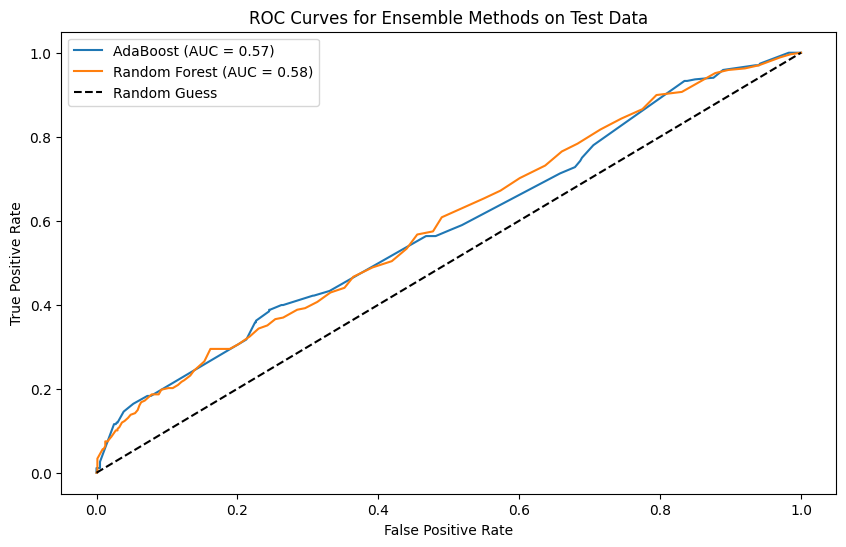

In [205]:

# Plot ROC curves for test data
plt.figure(figsize=(10, 6))

# AdaBoost ROC Curve
fpr_adaboost, tpr_adaboost, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_proba_test_adaboost.ravel())
plt.plot(fpr_adaboost, tpr_adaboost, label=f"AdaBoost (AUC = {roc_auc_adaboost:.2f})")

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_proba_test_rf.ravel())
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Finalize plot
plt.title("ROC Curves for Ensemble Methods on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
